In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/Data Mining/ufc_reaction/"

fighters = pd.read_csv(
    BASE_PATH + "fighters.csv",
    sep=";",
    encoding="cp1252"
)

fights = pd.read_csv(
    BASE_PATH + "fights.csv",
    sep=";",
    encoding="cp1252"
)



In [12]:
print(fighters.shape, '\n',
fighters.columns, '\n',
fighters.head())

(248, 16) 
 Index(['fight_id', 'fighter_name', 'oponent_name', 'age', 'weight_class',
       'reaction_type', 'reaction_volume', 'is_underdog', 'activity_change',
       'tempo_change', 'risk', 'strikes_landed', 'strikes_received',
       'significant_strikes', 'control_time_sec', 'win'],
      dtype='object') 
    fight_id    fighter_name    oponent_name  age  weight_class reaction_type  \
0         1        Adesanya          Romero   30  middleweight      negative   
1         1          Romero        Adesanya   42  middleweight      negative   
2         2  Conor Mcgregor       Jose Aldo   27   lightweight      positive   
3         2       Jose Aldo  Conor Mcgregor   29   lightweight      negative   
4         3  Conor McGregor       Nate Diaz   27  welterweight      positive   

   reaction_volume  is_underdog  activity_change  tempo_change  risk  \
0                1            0                0             0     1   
1                1            1                0             

In [48]:
print(fights.shape, '\n',
fights.columns, '\n',
fights.head())

(124, 7) 
 Index(['fight_id', 'fight_name', 'event', 'weight_class', 'scheduled_rounds',
       'finish_type', 'round_finish'],
      dtype='object') 
    fight_id                          fight_name                        event  \
0         1             Adesanya VS Yoel Romero                      UFC 248   
1         2         Conor McGregor VS Jose Aldo                      UFC 194   
2         3       Conor McGregor vs Nate Diaz 2  UFC 202: Diaz vs McGregor 2   
3         4  Anthony Johnson vs Glover Teixeira  UFC 202: Diaz vs McGregor 2   
4         5        Donald Cerrone vs Rick Story  UFC 202: Diaz vs McGregor 2   

        weight_class  scheduled_rounds finish_type  round_finish  
0       middleweight                 5    decision             0  
1        lightweight                 5      KO/TKO             1  
2       welterweight                 5    decision             0  
3  light heavyweight                 3      KO/TKO             1  
4       welterweight            

In [46]:
fights = fights.dropna(how="all")

fighters = fighters.dropna(how="all")


In [47]:
df = fighters.merge(fights, on="fight_id", how="left")

df["fight_id"].nunique(), fights["fight_id"].nunique()


(124, 124)

## Problem Definition and Objectives

This project investigates how crowd reaction influences fighter behavior and how these behavioral responses affect fight outcomes. Crowd reaction is treated as an external psychological stimulus, while changes in activity, tempo, and risk-taking are used as observable behavioral proxies.

The analysis is conducted at the fighter–fight level, with each row representing one fighter in one fight. The study combines exploratory analysis, supervised learning, and unsupervised learning to uncover relationships and hidden patterns.


In [15]:
df["reaction_type"].value_counts(normalize=True)


,proportion
reaction_type,
positive,0.576613
negative,0.318548
neutral,0.104839


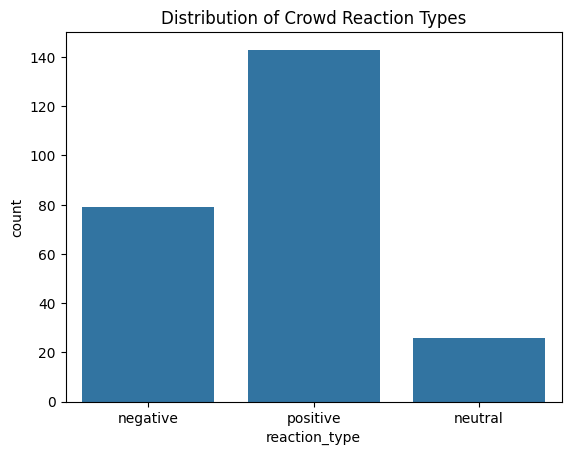

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="reaction_type")
plt.title("Distribution of Crowd Reaction Types")
plt.show()


In [17]:
df["reaction_volume"].value_counts().sort_index()


,count
reaction_volume,
0,5
1,86
2,48
3,109


In [93]:
pd.crosstab(
    df["reaction_type"],
    df["activity_change"],
    normalize="index"
)


activity_change,0,1
reaction_type,,
negative,0.949367,0.050633
neutral,0.846154,0.153846
positive,0.181818,0.818182


In [19]:
df.groupby("reaction_volume")["activity_change"].mean()


,activity_change
reaction_volume,
0,0.200000
1,0.058140
2,0.333333
3,0.944954


In [20]:
pd.crosstab(
    df["reaction_type"],
    df["tempo_change"],
    normalize="index"
)


tempo_change,0,1
reaction_type,,
negative,0.949367,0.050633
neutral,0.923077,0.076923
positive,0.209790,0.790210


In [21]:
df.groupby("reaction_volume")["tempo_change"].mean()


,tempo_change
reaction_volume,
0,0.00000
1,0.05814
2,0.25000
3,0.93578


In [22]:
pd.crosstab(
    df["reaction_type"],
    df["risk"],
    normalize="index"
)


risk,0,1
reaction_type,,
negative,0.835443,0.164557
neutral,0.884615,0.115385
positive,0.195804,0.804196


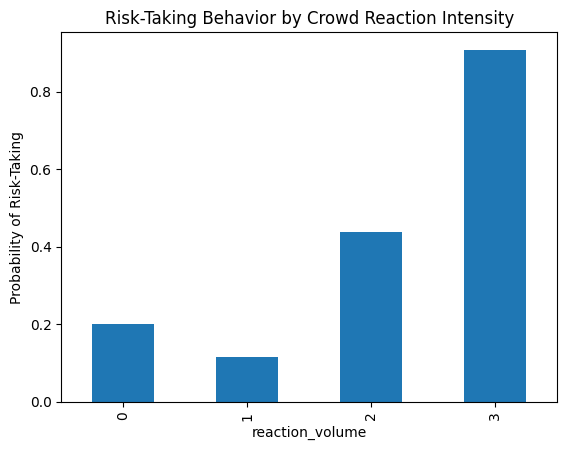

In [25]:
# print(df.groupby("reaction_volume")["risk"].mean())
df.groupby("reaction_volume")["risk"].mean().plot(kind="bar")
plt.ylabel("Probability of Risk-Taking")
plt.title("Risk-Taking Behavior by Crowd Reaction Intensity")
plt.show()



In [26]:
pd.crosstab(
    [df["reaction_type"], df["is_underdog"]],
    df["activity_change"],
    normalize="index"
)


activity_change                   0         1
reaction_type is_underdog                    
negative      0            0.800000  0.200000
              1            0.971014  0.028986
neutral       0            0.857143  0.142857
              1            0.842105  0.157895
positive      0            0.123810  0.876190
              1            0.342105  0.657895

In [27]:
pd.crosstab(
    df["activity_change"],
    df["risk"],
    normalize="index"
)


risk,0,1
activity_change,,
0,0.845528,0.154472
1,0.104000,0.896000


## Crowd Reaction and Behavioral Responses

Exploratory analysis indicates that crowd reaction is strongly associated with observable changes in fighter behavior. Negative and high-intensity crowd reactions are linked to increased activity changes, tempo instability, and higher risk-taking behavior. These effects are more pronounced among underdog fighters, suggesting that crowd pressure interacts with pre-fight context. Importantly, not all behavioral changes imply increased risk, indicating the presence of adaptive and maladaptive response patterns.


In [28]:
df.groupby("activity_change")["win"].mean()


,win
activity_change,
0,0.319672
1,0.669355


In [29]:
pd.crosstab(
    df["activity_change"],
    df["win"],
    normalize="index"
)


win,0.0,1.0
activity_change,,
0,0.680328,0.319672
1,0.330645,0.669355


In [31]:
print(df.groupby("tempo_change")["win"].mean(), '\n')
pd.crosstab(
    df["tempo_change"],
    df["win"],
    normalize="index"
)


tempo_change
0    0.335938
1    0.669492
Name: win, dtype: float64 



win,0.0,1.0
tempo_change,,
0,0.664062,0.335938
1,0.330508,0.669492


In [33]:
print(df.groupby("risk")["win"].mean(), '\n')
pd.crosstab(
    df["risk"],
    df["win"],
    normalize="index")

risk
0    0.301724
1    0.669231
Name: win, dtype: float64 



win,0.0,1.0
risk,,
0,0.698276,0.301724
1,0.330769,0.669231


In [34]:
df.groupby(
    ["activity_change", "risk"]
)["win"].mean()


activity_change  risk
0                0       0.271845
                 1       0.578947
1                0       0.538462
                 1       0.684685
Name: win, dtype: float64

In [35]:
df.groupby(
    ["reaction_volume", "activity_change"]
)["win"].mean()


reaction_volume  activity_change
0                0                  0.250000
                 1                  0.000000
1                0                  0.300000
                 1                  0.200000
2                0                  0.375000
                 1                  0.625000
3                0                  0.333333
                 1                  0.705882
Name: win, dtype: float64

In [37]:
df["high_control"] = (
    df["control_time_sec"] > df["control_time_sec"].median()
).astype(int)


df.groupby(
    ["activity_change", "high_control"]
)["win"].mean()


activity_change  high_control
0                0               0.323077
                 1               0.315789
1                0               0.684932
                 1               0.647059
Name: win, dtype: float64

## Behavioral Changes and Fight Outcomes

Analysis shows that behavioral responses following crowd reaction are meaningfully associated with fight outcomes. Fighters who experience tempo disruption or engage in increased risk-taking generally exhibit lower win probabilities. Activity changes alone are not uniformly negative; however, when combined with high crowd pressure or increased risk, they are associated with poorer outcomes. Importantly, strong performance indicators such as control time can partially offset negative behavioral effects, suggesting an interaction between psychological response and technical dominance.


In [38]:
num_cols = [
    "reaction_volume",
    "age",
    "activity_change",
    "tempo_change",
    "risk",
    "strikes_landed",
    "strikes_received",
    "significant_strikes",
    "control_time_sec",
    "win"
]


In [39]:
corr = df[num_cols].corr()
corr


,reaction_volume,age,activity_change,tempo_change,risk,strikes_landed,strikes_received,significant_strikes,control_time_sec,win
reaction_volume,1.000000,-0.043741,0.775992,0.788011,0.696272,0.378340,0.047469,0.435034,0.029800,0.354903
age,-0.043741,1.000000,0.042786,0.048045,-0.019301,-0.011375,0.012023,-0.040781,0.112603,-0.119388
activity_change,0.775992,0.042786,1.000000,0.920459,0.742689,0.390783,0.032894,0.446708,0.018786,0.349683
tempo_change,0.788011,0.048045,0.920459,1.000000,0.778343,0.388808,0.059038,0.443914,-0.021418,0.333289
risk,0.696272,-0.019301,0.742689,0.778343,1.000000,0.319882,-0.021981,0.378850,-0.125437,0.366923
strikes_landed,0.378340,-0.011375,0.390783,0.388808,0.319882,1.000000,0.807531,0.968571,-0.130893,0.139066
strikes_received,0.047469,0.012023,0.032894,0.059038,-0.021981,0.807531,1.000000,0.749400,-0.183684,-0.201408
significant_strikes,0.435034,-0.040781,0.446708,0.443914,0.378850,0.968571,0.749400,1.000000,-0.210782,0.192101
control_time_sec,0.029800,0.112603,0.018786,-0.021418,-0.125437,-0.130893,-0.183684,-0.210782,1.000000,-0.001469
win,0.354903,-0.119388,0.349683,0.333289,0.366923,0.139066,-0.201408,0.192101,-0.001469,1.000000


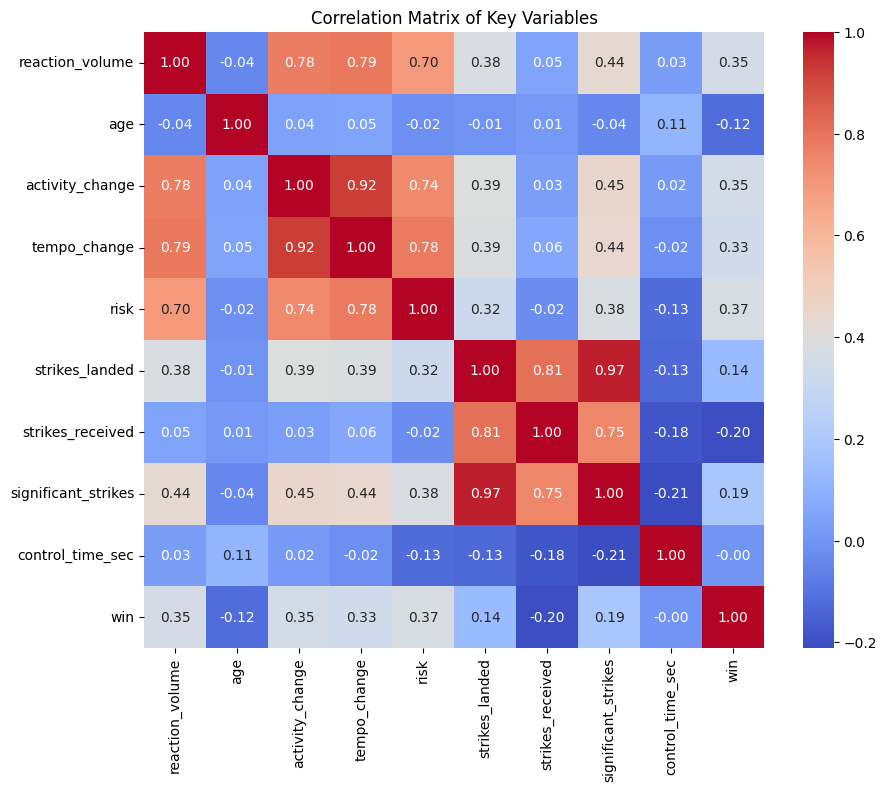

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix of Key Variables")
plt.show()


### Supervised modeling to quantify effects and control for confounders

In [41]:
TARGET = "win"

In [42]:
FEATURES_BEHAVIOR = [
    "reaction_volume",
    "activity_change",
    "tempo_change",
    "risk"
]


In [43]:
FEATURES_CONTEXT = FEATURES_BEHAVIOR + [
    "age",
    "is_underdog"
]


In [44]:
FEATURES_FULL = FEATURES_CONTEXT + [
    "strikes_landed",
    "strikes_received",
    "significant_strikes",
    "control_time_sec"
]


In [51]:
from sklearn.model_selection import train_test_split

df_cleaned = df.dropna(subset=[TARGET])

X = df_cleaned[FEATURES_FULL]
y = df_cleaned[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [56]:
df


,fight_id,fighter_name,oponent_name,age,weight_class_x,reaction_type,reaction_volume,is_underdog,activity_change,tempo_change,...,strikes_received,significant_strikes,control_time_sec,win,fight_name,event,weight_class_y,scheduled_rounds,finish_type,round_finish
0,1,Adesanya,Romero,30,middleweight,negative,1,0,0,0,...,40,48,0,1.0,Adesanya VS Yoel Romero,UFC 248,middleweight,5,decision,0
1,1,Romero,Adesanya,42,middleweight,negative,1,1,0,0,...,48,40,0,0.0,Adesanya VS Yoel Romero,UFC 248,middleweight,5,decision,0
2,2,Conor Mcgregor,Jose Aldo,27,lightweight,positive,3,1,0,0,...,1,5,0,1.0,Conor McGregor VS Jose Aldo,UFC 194,lightweight,5,KO/TKO,1
3,2,Jose Aldo,Conor Mcgregor,29,lightweight,negative,3,0,1,1,...,5,1,0,0.0,Conor McGregor VS Jose Aldo,UFC 194,lightweight,5,KO/TKO,1
4,3,Conor McGregor,Nate Diaz,27,welterweight,positive,3,0,1,1,...,166,109,0,1.0,Conor McGregor vs Nate Diaz 2,UFC 202: Diaz vs McGregor 2,welterweight,5,decision,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,122,Choi Tu Ho,Kab Swanson,25,featherweight,neutral,1,1,0,0,...,88,34,20,0.0,Kab Swanson VS Choi Tu Ho,UFC 206,Featherweight,3,Decision,0
244,123,Jiri Prochazka,Glover Teixeira,29,light heavyweight,positive,3,0,1,1,...,79,74,0,1.0,Glover Teixeira VS Jiri Prochazka,UFC 275,Light Heavyweight,5,Submission,0
245,123,Glover Teixeira,Jiri Prochazka,42,light heavyweight,positive,2,1,0,1,...,102,39,30,0.0,Glover Teixeira VS Jiri Prochazka,UFC 275,Light Heavyweight,5,Submission,0
246,124,Robbie Lawler,Rory Macdonald,33,welterweight,positive,2,0,0,0,...,60,62,0,1.0,Robbie Lawler VS Rory Macdonald,UFC 189,Welterweight,5,Decision,0


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = log_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))


Accuracy: 0.7741935483870968
Precision: 0.7741935483870968
Recall: 0.7741935483870968
F1-score: 0.7741935483870968


In [92]:
confusion_matrix(y_test, y_pred)


array([[24,  7],
       [ 7, 24]])

In [58]:
import pandas as pd

coef_df = pd.DataFrame({
    "feature": FEATURES_FULL,
    "coefficient": log_model.coef_[0]
}).sort_values(by="coefficient", ascending=False)

coef_df


,feature,coefficient
6,strikes_landed,0.817628
8,significant_strikes,0.529912
1,activity_change,0.264666
0,reaction_volume,0.130545
3,risk,0.115648
9,control_time_sec,0.077540
5,is_underdog,-0.115275
2,tempo_change,-0.252949
4,age,-0.300283
7,strikes_received,-1.573357


In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300, random_state=42)

In [60]:
y_pred_rf = rf_model.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF F1-score:", f1_score(y_test, y_pred_rf))


RF Accuracy: 0.7419354838709677
RF F1-score: 0.7575757575757576


In [61]:
importances = pd.DataFrame({
    "feature": FEATURES_FULL,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

importances


,feature,importance
4,age,0.220134
7,strikes_received,0.209734
6,strikes_landed,0.145548
8,significant_strikes,0.136166
5,is_underdog,0.074083
9,control_time_sec,0.064820
0,reaction_volume,0.057558
3,risk,0.036059
1,activity_change,0.033830
2,tempo_change,0.022068


### CLUSTERING BABY

In [63]:
CLUSTER_FEATURES = [
    "reaction_volume",
    "activity_change",
    "tempo_change",
    "risk",
    "strikes_landed",
    "control_time_sec"
]


In [64]:
from sklearn.preprocessing import StandardScaler

X_cluster = df[CLUSTER_FEATURES]

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)


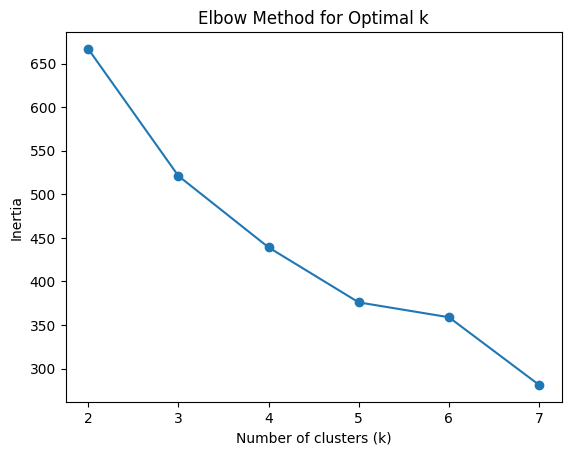

In [65]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 8)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster_scaled)
    inertia.append(km.inertia_)

import matplotlib.pyplot as plt

plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [66]:
kmeans = KMeans(n_clusters=6, random_state=42)
df["cluster"] = kmeans.fit_predict(X_cluster_scaled)


In [67]:
cluster_profile = df.groupby("cluster")[CLUSTER_FEATURES].mean()
cluster_profile


,reaction_volume,activity_change,tempo_change,risk,strikes_landed,control_time_sec
cluster,,,,,,
0,1.222222,0.024691,0.012346,0.209877,28.172840,19.777778
1,2.816327,0.989796,0.979592,1.000000,78.581633,10.510204
2,1.687500,0.187500,0.000000,0.000000,46.875000,182.000000
3,2.833333,1.000000,1.000000,0.833333,52.500000,177.388889
4,1.419355,0.032258,0.000000,0.032258,85.354839,13.225806
5,3.000000,1.000000,1.000000,0.000000,56.750000,8.750000


In [68]:
df.groupby("cluster")["win"].mean()


,win
cluster,
0,0.312500
1,0.673469
2,0.312500
3,0.764706
4,0.354839
5,0.500000


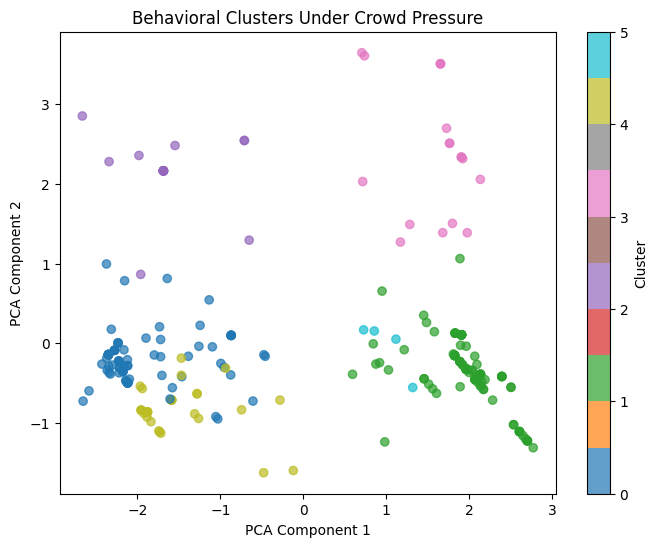

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df["cluster"],
    cmap="tab10",
    alpha=0.7
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Behavioral Clusters Under Crowd Pressure")
plt.colorbar(label="Cluster")
plt.show()




In [72]:
print(pd.crosstab(df["cluster"], df["reaction_type"], normalize="index"))
print('\n')
print(pd.crosstab(df["cluster"], df["is_underdog"], normalize="index"))


reaction_type  negative   neutral  positive
cluster                                    
0              0.580247  0.234568  0.185185
1              0.040816  0.020408  0.938776
2              0.625000  0.125000  0.250000
3              0.000000  0.000000  1.000000
4              0.580645  0.096774  0.322581
5              0.000000  0.000000  1.000000


is_underdog         0         1
cluster                        
0            0.197531  0.802469
1            0.724490  0.275510
2            0.312500  0.687500
3            0.944444  0.055556
4            0.354839  0.645161
5            0.500000  0.500000


In [74]:
age_df = df[
    (df["age"] >= 20) & (df["age"] <= 44)
]

age_behavior = (
    age_df
    .groupby("age")[["activity_change", "tempo_change", "risk"]]
    .mean()
    .reset_index()
)



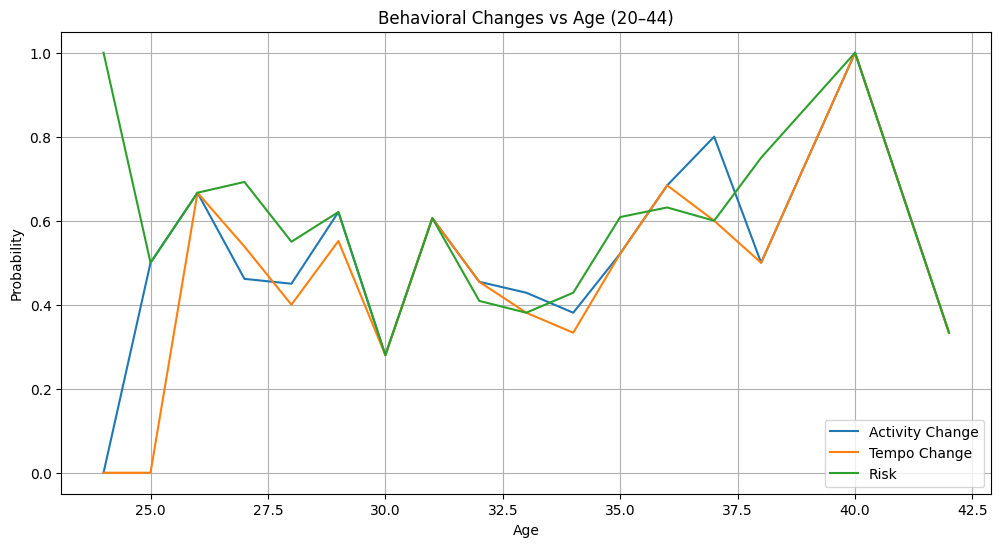

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(age_behavior["age"], age_behavior["activity_change"], label="Activity Change")
plt.plot(age_behavior["age"], age_behavior["tempo_change"], label="Tempo Change")
plt.plot(age_behavior["age"], age_behavior["risk"], label="Risk")

plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("Behavioral Changes vs Age (20–44)")
plt.legend()
plt.grid(True)
plt.show()


In [76]:
weight_order = [
    "flyweight",
    "bantamweight",
    "featherweight",
    "lightweight",
    "welterweight",
    "middleweight",
    "light heavyweight",
    "heavyweight"
]


In [83]:
df.columns


Index(['fight_id', 'fighter_name', 'oponent_name', 'age', 'weight_class_x',
       'reaction_type', 'reaction_volume', 'is_underdog', 'activity_change',
       'tempo_change', 'risk', 'strikes_landed', 'strikes_received',
       'significant_strikes', 'control_time_sec', 'win', 'fight_name', 'event',
       'weight_class_y', 'scheduled_rounds', 'finish_type', 'round_finish',
       'cluster'],
      dtype='object')

In [84]:
men_df = df.copy()

weight_behavior = (
    men_df
    .groupby("weight_class_x")[["activity_change", "tempo_change", "risk"]]
    .mean()
    .reindex(weight_order)
    .reset_index()
)

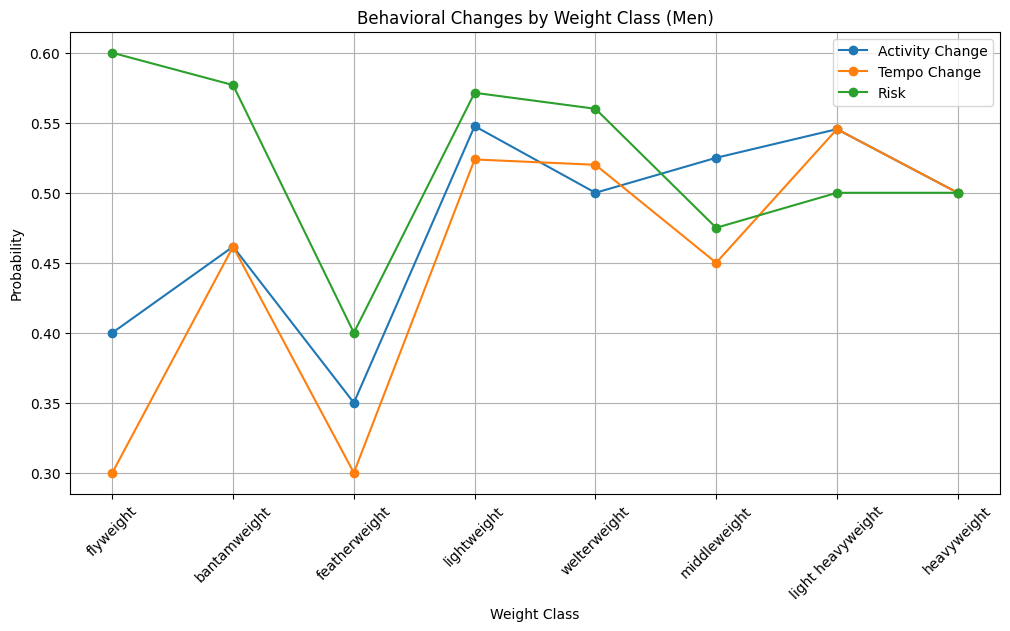

In [85]:
plt.figure(figsize=(12, 6))

x = range(len(weight_behavior))

plt.plot(x, weight_behavior["activity_change"], marker='o', label="Activity Change")
plt.plot(x, weight_behavior["tempo_change"], marker='o', label="Tempo Change")
plt.plot(x, weight_behavior["risk"], marker='o', label="Risk")

plt.xticks(x, weight_behavior["weight_class_x"], rotation=45)
plt.xlabel("Weight Class")
plt.ylabel("Probability")
plt.title("Behavioral Changes by Weight Class (Men)")
plt.legend()
plt.grid(True)
plt.show()

In [86]:
reaction_win = (
    df
    .groupby("reaction_type")["win"]
    .mean()
    .reset_index()
)


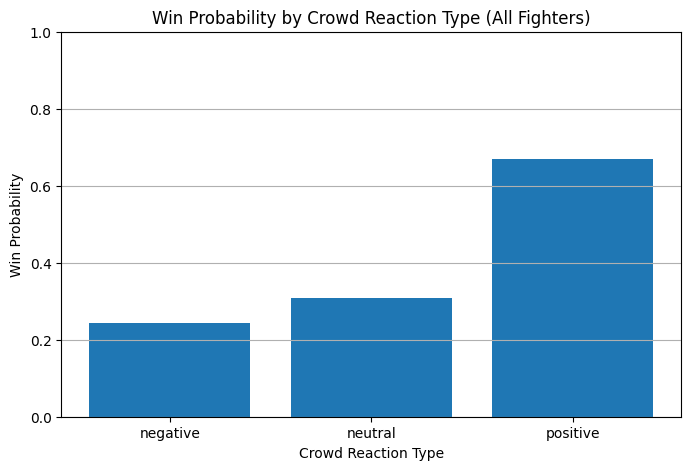

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.bar(
    reaction_win["reaction_type"],
    reaction_win["win"]
)

plt.ylabel("Win Probability")
plt.xlabel("Crowd Reaction Type")
plt.title("Win Probability by Crowd Reaction Type (All Fighters)")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


In [88]:
reaction_win_ud = (
    df
    .groupby(["reaction_type", "is_underdog"])["win"]
    .mean()
    .reset_index()
)


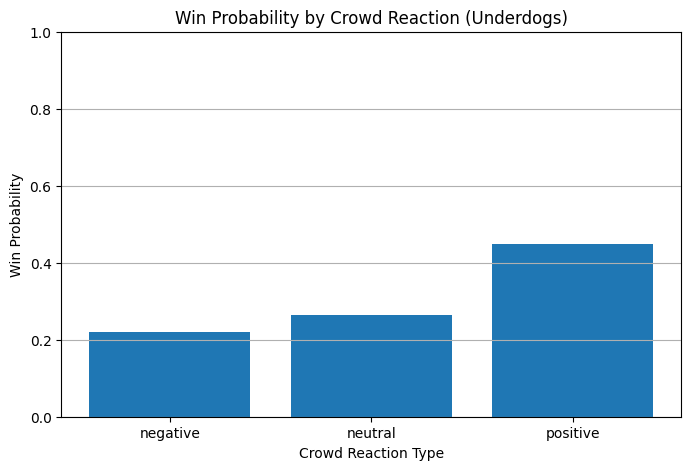

In [89]:
underdogs = reaction_win_ud[reaction_win_ud["is_underdog"] == 1]

plt.figure(figsize=(8, 5))

plt.bar(
    underdogs["reaction_type"],
    underdogs["win"]
)

plt.ylabel("Win Probability")
plt.xlabel("Crowd Reaction Type")
plt.title("Win Probability by Crowd Reaction (Underdogs)")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


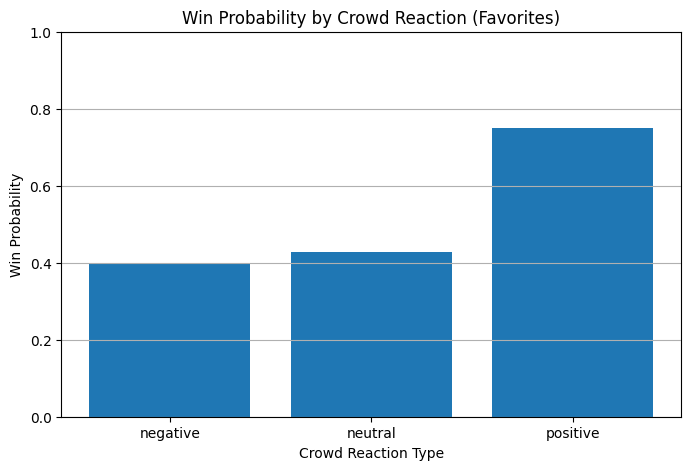

In [90]:
favorites = reaction_win_ud[reaction_win_ud["is_underdog"] == 0]

plt.figure(figsize=(8, 5))

plt.bar(
    favorites["reaction_type"],
    favorites["win"]
)

plt.ylabel("Win Probability")
plt.xlabel("Crowd Reaction Type")
plt.title("Win Probability by Crowd Reaction (Favorites)")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


/tmp/ipython-input-2235140133.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


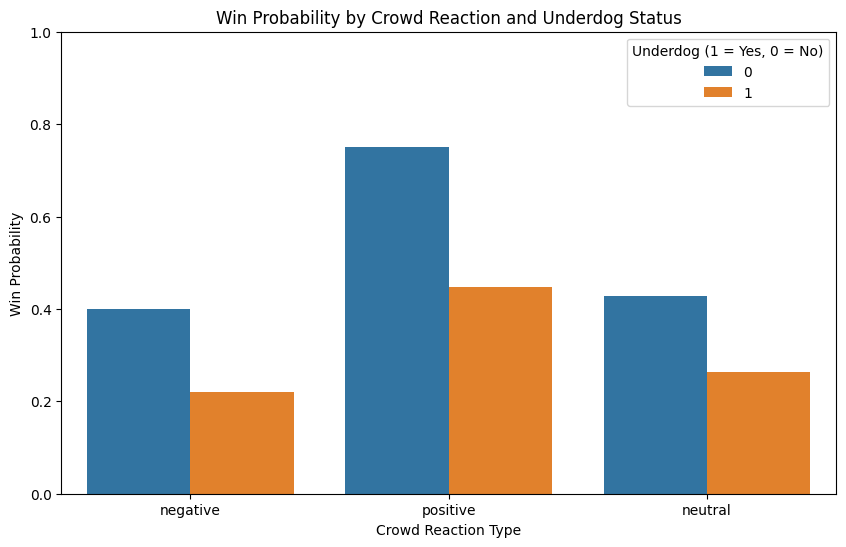

In [91]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="reaction_type",
    y="win",
    hue="is_underdog",
    ci=None
)

plt.xlabel("Crowd Reaction Type")
plt.ylabel("Win Probability")
plt.title("Win Probability by Crowd Reaction and Underdog Status")
plt.legend(title="Underdog (1 = Yes, 0 = No)")
plt.ylim(0, 1)
plt.show()
